In [5]:
#
# --- INTEGRATED SYSTEM EVALUATION CELL (FINAL) ---
#

import sys
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# --- PATHING SETUP ---
# Ensures the notebook can find the 'shallnotcrash' package.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    logging.info(f"Added project root to Python path: {project_root}")


In [6]:
# --- Step 1: Import components ---
# This will load the corrected, architecturally-compliant modules.
from shallnotcrash.emergency.synthetic_data import generate_training_data
from shallnotcrash.emergency.core import EMERGENCY_COORDINATOR
from shallnotcrash.emergency.analyzers.pattern_recognizer import EmergencyPattern


/home/aveey/Documents/shallnotcrash/shallnotcrash/emergency/analyzers/correlation_analyzer.py:166: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(series1[:min_length], series2[:min_length])



      CLASSIFICATION REPORT (INTEGRATED SYSTEM)
                    precision    recall  f1-score   support

            NORMAL       0.19      1.00      0.32       250
ENGINE_DEGRADATION       1.00      0.82      0.90       255
         FUEL_LEAK       0.48      0.93      0.63       260
STRUCTURAL_FATIGUE       0.00      0.00      0.00       231
ELECTRICAL_FAILURE       0.00      0.00      0.00       261
  WEATHER_DISTRESS       0.00      0.00      0.00       231
    SYSTEM_CASCADE       0.00      0.00      0.00       271
 UNKNOWN_EMERGENCY       0.00      0.00      0.00       241

          accuracy                           0.35      2000
         macro avg       0.21      0.34      0.23      2000
      weighted avg       0.21      0.35      0.24      2000




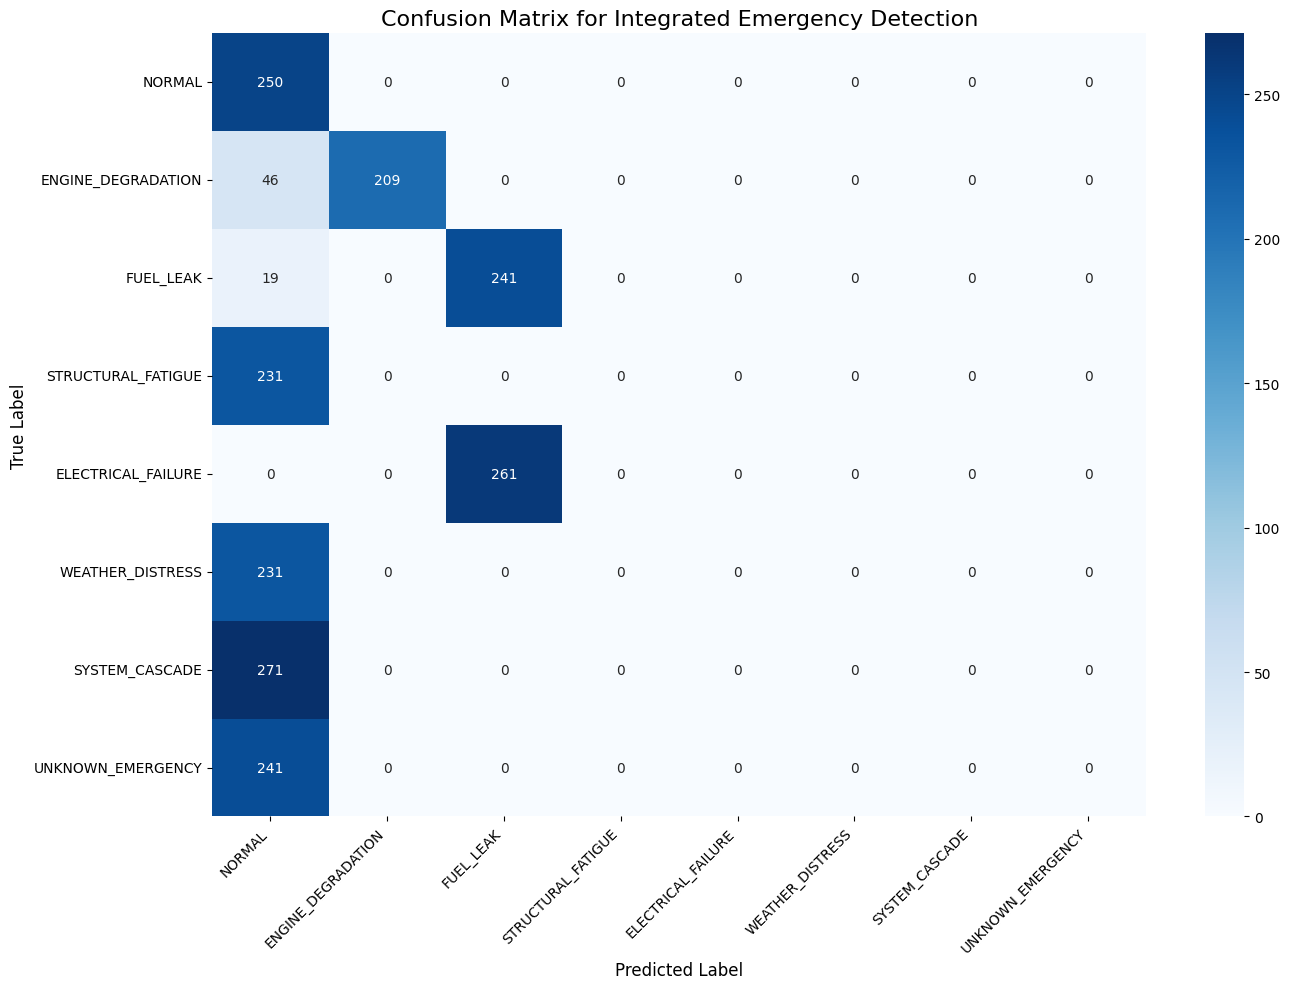

In [7]:


# --- Configuration ---
NUM_TEST_SAMPLES = 2000

# --- Step 2: Validate Coordinator Status ---
if not EMERGENCY_COORDINATOR.is_loaded:
    logging.error("FATAL: The EMERGENCY_COORDINATOR is not operational. Evaluation cannot proceed.")
else:
    # --- Step 3: Generate Unseen Test Data ---
    logging.info(f"Generating {NUM_TEST_SAMPLES} new, unseen test samples...")
    # Assuming generate_training_data returns data with integer labels
    test_data = generate_training_data(NUM_TEST_SAMPLES)
    
    true_labels = []
    predicted_labels = []

    # --- Step 4: Execute Detection Pipeline ---
    logging.info("Running test samples through the integrated EMERGENCY_COORDINATOR...")
    for i, sample in enumerate(test_data):
        if (i + 1) % 200 == 0:
            logging.info(f"  Processing sample {i+1}/{NUM_TEST_SAMPLES}...")
        
        # The true label is the integer value of the emergency pattern
        true_labels.append(sample['pattern_label'])
        
        # The coordinator returns a full PatternResult object
        result = EMERGENCY_COORDINATOR.detect(telemetry=sample['telemetry'])
        
        # The predicted label is the integer value from the result's pattern_type
        predicted_labels.append(result.pattern_type.value)

    # --- Step 5: Analyze and Display Results ---
    logging.info("Evaluation complete. Generating performance reports...")
    
    # --- ARCHITECTURAL CORRECTION IN REPORTING ---
    # Get the integer values for scikit-learn functions
    report_labels_int = sorted([p.value for p in EmergencyPattern])
    # Get the string names for clear, human-readable plot labels
    plot_labels_str = [EmergencyPattern(i).name for i in report_labels_int]
    
    # Corrected Title
    print("\n" + "="*50)
    print("      CLASSIFICATION REPORT (INTEGRATED SYSTEM)")
    print("="*50)
    report = classification_report(
        true_labels, 
        predicted_labels, 
        labels=report_labels_int,
        target_names=plot_labels_str, # Use string names for the report
        zero_division=0
    )
    print(report)
    print("="*50 + "\n")

    # Generate confusion matrix with integer labels
    cm = confusion_matrix(true_labels, predicted_labels, labels=report_labels_int)
    
    # Display confusion matrix with clear string labels
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=plot_labels_str, yticklabels=plot_labels_str)
    
    # Corrected Title
    plt.title('Confusion Matrix for Integrated Emergency Detection', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=45, ha="right") # Improved rotation for readability
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [8]:
#!/usr/bin/env python3
"""
Training script for the ShallNotCrash Emergency Pattern Recognizer.
"""
import logging
import os
import sys

# --- PATHING SETUP ---
# Ensures the script can find the 'shallnotcrash' package.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Configure basic logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- IMPORTS ---
from shallnotcrash.emergency.synthetic_data import generate_training_data
from shallnotcrash.emergency.analyzers.pattern_recognizer import PATTERN_RECOGNIZER

# --- CONFIGURATION ---
NUM_TRAINING_SAMPLES = 10000
MODEL_DIR = os.path.join(project_root, 'models')
MODEL_FILENAME = "c172p_pattern_recognizer_v1.joblib"
MODEL_PATH = os.path.join(MODEL_DIR, MODEL_FILENAME)

def main():
    """Main training function."""
    logging.info("--- Starting Emergency Pattern Recognizer Training Protocol ---")

    # --- Step 1: Ensure model directory exists ---
    if not os.path.exists(MODEL_DIR):
        logging.info(f"Model directory not found. Creating directory at: {MODEL_DIR}")
        os.makedirs(MODEL_DIR)

    # --- Step 2: Generate Training Data ---
    logging.info(f"Generating {NUM_TRAINING_SAMPLES} samples for training...")
    training_data = generate_training_data(NUM_TRAINING_SAMPLES)
    logging.info("Training data generation complete.")

    # --- Step 3: Train the Models ---
    logging.info("Passing data to the Pattern Recognizer for training...")
    # The train_models method is part of the PatternRecognizer class
    PATTERN_RECOGNIZER.train_models(training_data)
    logging.info("Model training complete.")

    # --- Step 4: Save the Trained Models ---
    logging.info(f"Saving trained model artifact to: {MODEL_PATH}")
    PATTERN_RECOGNIZER.save_models(MODEL_PATH)
    logging.info("--- Training Protocol Finished Successfully ---")

if __name__ == "__main__":
    main()

/home/aveey/Documents/shallnotcrash/shallnotcrash/emergency/analyzers/correlation_analyzer.py:166: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(series1[:min_length], series2[:min_length])
/home/aveey/Documents/shallnotcrash/shallnotcrash/emergency/analyzers/correlation_analyzer.py:166: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(series1[:min_length], series2[:min_length])
/home/aveey/Documents/shallnotcrash/shallnotcrash/emergency/analyzers/correlation_analyzer.py:166: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(series1[:min_length], series2[:min_length])
/home/aveey/Documents/shallnotcrash/shallnotcrash/emergency/analyzers/correlation_analyzer.py:166: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(series1[:min


      CLASSIFICATION REPORT (INTEGRATED SYSTEM)
                    precision    recall  f1-score   support

            NORMAL       0.00      0.00      0.00       250
ENGINE_DEGRADATION       0.20      0.97      0.34       238
         FUEL_LEAK       0.17      0.14      0.15       242
STRUCTURAL_FATIGUE       0.00      0.00      0.00       257
ELECTRICAL_FAILURE       0.37      0.98      0.53       249
  WEATHER_DISTRESS       0.00      0.00      0.00       242
    SYSTEM_CASCADE       0.00      0.00      0.00       251
 UNKNOWN_EMERGENCY       0.00      0.00      0.00       271

          accuracy                           0.26      2000
         macro avg       0.09      0.26      0.13      2000
      weighted avg       0.09      0.26      0.13      2000




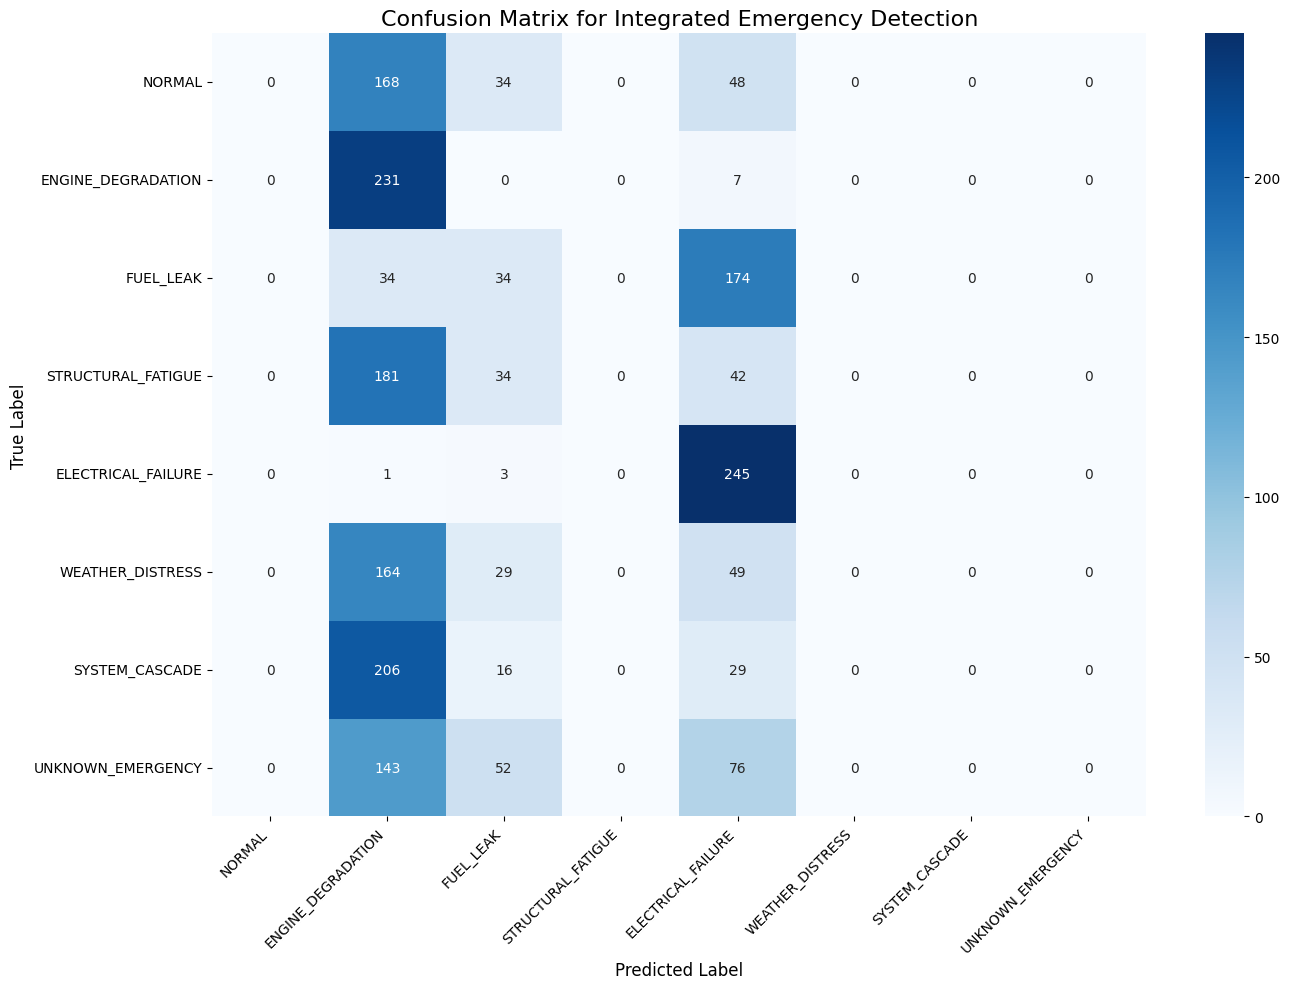

In [9]:


# --- Configuration ---
NUM_TEST_SAMPLES = 2000

# --- Step 2: Validate Coordinator Status ---
if not EMERGENCY_COORDINATOR.is_loaded:
    logging.error("FATAL: The EMERGENCY_COORDINATOR is not operational. Evaluation cannot proceed.")
else:
    # --- Step 3: Generate Unseen Test Data ---
    logging.info(f"Generating {NUM_TEST_SAMPLES} new, unseen test samples...")
    # Assuming generate_training_data returns data with integer labels
    test_data = generate_training_data(NUM_TEST_SAMPLES)
    
    true_labels = []
    predicted_labels = []

    # --- Step 4: Execute Detection Pipeline ---
    logging.info("Running test samples through the integrated EMERGENCY_COORDINATOR...")
    for i, sample in enumerate(test_data):
        if (i + 1) % 200 == 0:
            logging.info(f"  Processing sample {i+1}/{NUM_TEST_SAMPLES}...")
        
        # The true label is the integer value of the emergency pattern
        true_labels.append(sample['pattern_label'])
        
        # The coordinator returns a full PatternResult object
        result = EMERGENCY_COORDINATOR.detect(telemetry=sample['telemetry'])
        
        # The predicted label is the integer value from the result's pattern_type
        predicted_labels.append(result.pattern_type.value)

    # --- Step 5: Analyze and Display Results ---
    logging.info("Evaluation complete. Generating performance reports...")
    
    # --- ARCHITECTURAL CORRECTION IN REPORTING ---
    # Get the integer values for scikit-learn functions
    report_labels_int = sorted([p.value for p in EmergencyPattern])
    # Get the string names for clear, human-readable plot labels
    plot_labels_str = [EmergencyPattern(i).name for i in report_labels_int]
    
    # Corrected Title
    print("\n" + "="*50)
    print("      CLASSIFICATION REPORT (INTEGRATED SYSTEM)")
    print("="*50)
    report = classification_report(
        true_labels, 
        predicted_labels, 
        labels=report_labels_int,
        target_names=plot_labels_str, # Use string names for the report
        zero_division=0
    )
    print(report)
    print("="*50 + "\n")

    # Generate confusion matrix with integer labels
    cm = confusion_matrix(true_labels, predicted_labels, labels=report_labels_int)
    
    # Display confusion matrix with clear string labels
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=plot_labels_str, yticklabels=plot_labels_str)
    
    # Corrected Title
    plt.title('Confusion Matrix for Integrated Emergency Detection', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=45, ha="right") # Improved rotation for readability
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()